## TEM image analysis
___

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.filters import sobel
from skimage.color import rgb2gray, label2rgb
from skimage import data,io,filters,measure,img_as_ubyte,segmentation, morphology
import skimage
from scipy import ndimage as ndi

In [3]:
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


255

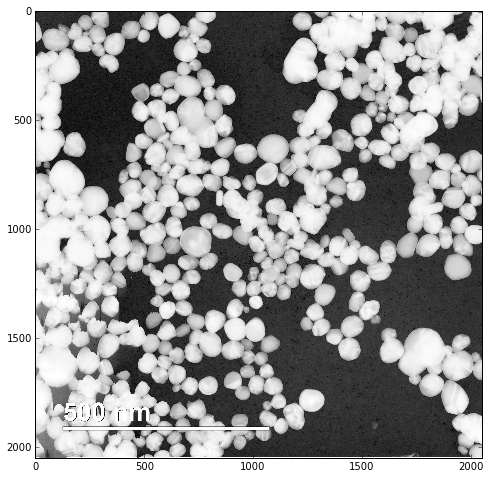

In [5]:
orig = io.imread('AgNP-12.tif')
imggray = np.invert(img_as_ubyte(rgb2gray(orig)))
fig = plt.figure(figsize=(10,8))
plt.gray()
plt.imshow(imggray)
imggray.max()

(-0.5, 2047.5, 2047.5, -0.5)

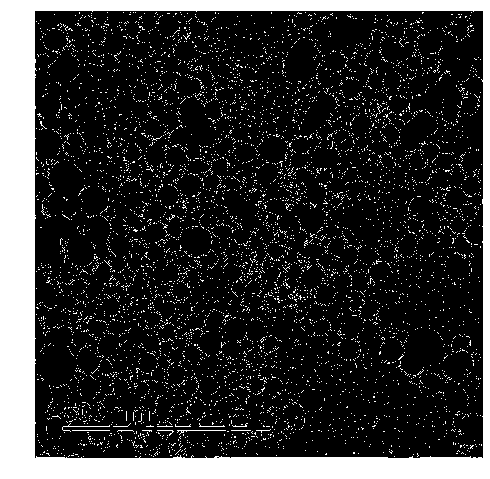

In [6]:
from skimage.feature import canny
edges = canny(imggray/255.)

fig, ax = plt.subplots(figsize=(10,8))
ax.imshow(edges, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')

(-0.5, 2047.5, 2047.5, -0.5)

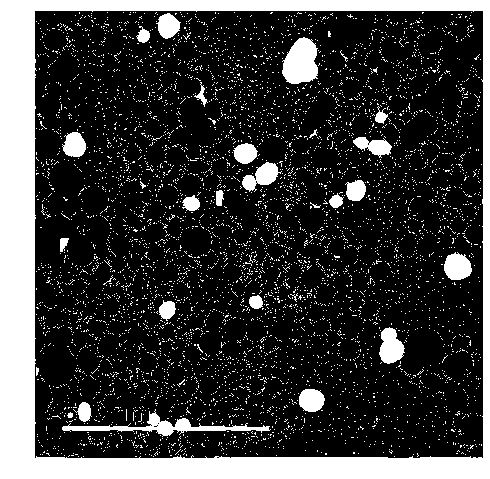

In [9]:
imgfill = ndi.binary_fill_holes(edges)

fig, ax = plt.subplots(figsize=(10,8))
ax.imshow(imgfill, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')

(-0.5, 2047.5, 2047.5, -0.5)

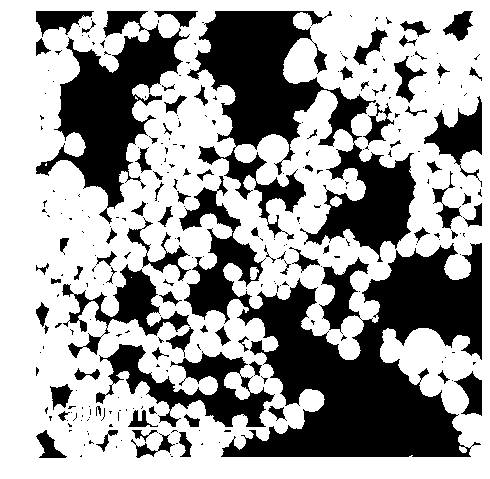

In [36]:
segmentation = morphology.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(10,8))
ax.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')

Number of regions: 7985


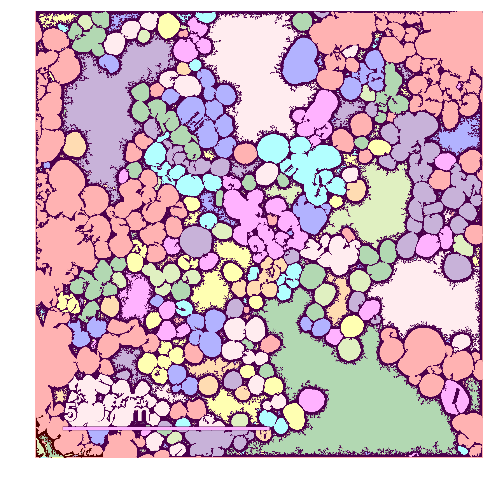

In [144]:
imgndilbl, numlbls = measure.label(imgfill, connectivity=2, return_num=True)
imgoverlay = label2rgb(imgndilbl, image=imgfill)

print("Number of regions: "+str(numlbls))

plt.figure(figsize=(10,8))
plt.axis('off')
axes = plt.imshow(imgoverlay)

In [146]:
regions = measure.regionprops(imgndilbl)

# Find labels with desired eccentricity and area

ecc = []
area = []
solid = []
extent = []
for i in range(len(regions)):
    ecc.append(regions[i].eccentricity)
    area.append(regions[i].area)
    solid.append(regions[i].solidity)
    extent.append(regions[i].extent)